In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")

df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [3]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [5]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [6]:
channel_purchases = df.groupby('sales_channel').size()

channel_purchases

sales_channel
Internet    44382
Mobile       5618
dtype: int64

## Exploratory Data Analysis (EDA)

> Does the sales channel affect the probability of customers buying holidays? Analyze the different sales channels in the "sales_channel" column and their impact on the target variable.

In [7]:
#writing a function for the plot in order to avoid duplicates
def plot_attributes():
    print(" ")
    
#data setup    
    
    plt.figure(figsize=[10, 7])

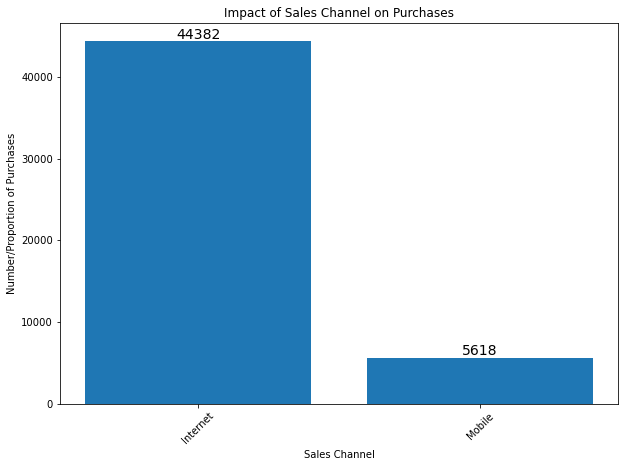

In [8]:
plot_attributes();


channel_purchases = df.groupby('sales_channel').size()

ax = plt.bar(channel_purchases.index, channel_purchases)

for i, rect in enumerate(ax):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 300, str(height), ha='center', fontsize=14)
 
plt.xlabel('Sales Channel')
plt.ylabel('Number/Proportion of Purchases')
plt.title('Impact of Sales Channel on Purchases')
plt.xticks(rotation=45)
plt.show()


> How does the trip type (one-way, round trip, etc.) influence customers' purchasing behavior? Examine the "trip_type" column and its relationship with the target variable.

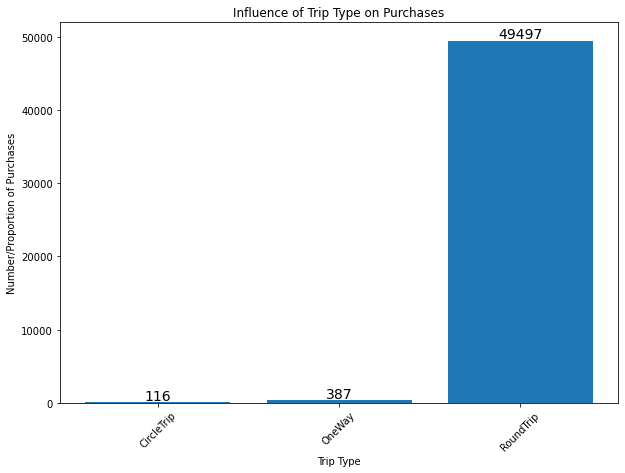

In [9]:
plot_attributes();


trip_type_purchases = df.groupby('trip_type').size()

ax = plt.bar(trip_type_purchases.index, trip_type_purchases)

for i, rect in enumerate(ax):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 300, str(height), ha='center', fontsize=14)
 
plt.xlabel('Trip Type')
plt.ylabel('Number/Proportion of Purchases')
plt.title('Influence of Trip Type on Purchases')
plt.xticks(rotation=45)
plt.show()



> Does the lead time between purchase and departure (purchase_lead) affect the likelihood of customers buying holidays? 

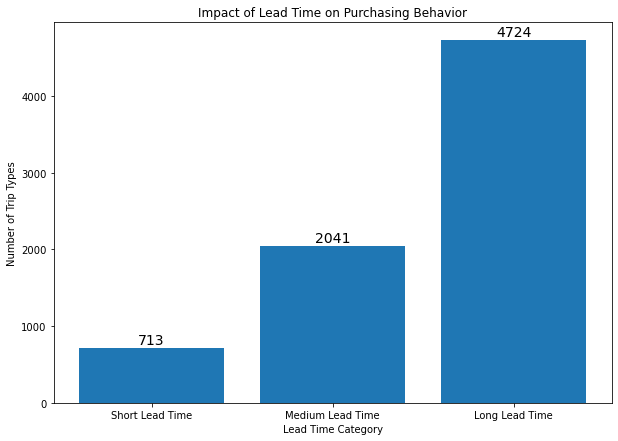

In [10]:
plot_attributes();

# Categorize lead time into bins
bins = [0, 7, 30, float('inf')]
labels = ['Short Lead Time', 'Medium Lead Time', 'Long Lead Time']
df['lead_time_category'] = pd.cut(df['purchase_lead'], bins=bins, labels=labels, right=False)


df['booking_yes'] = df.booking_complete ==1

# Calculate the proportion of purchases in each lead time category
purchase_counts = df.groupby('lead_time_category')['booking_yes'].sum()  # Use any appropriate column for counting purchases

# Plot the results
ax = plt.bar(purchase_counts.index, purchase_counts)

for i, rect in enumerate(ax):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 50, str(height), ha='center', fontsize=14)
 
plt.xlabel('Lead Time Category')
plt.ylabel('Number of Trip Types')
plt.title('Impact of Lead Time on Purchasing Behavior')
plt.show()

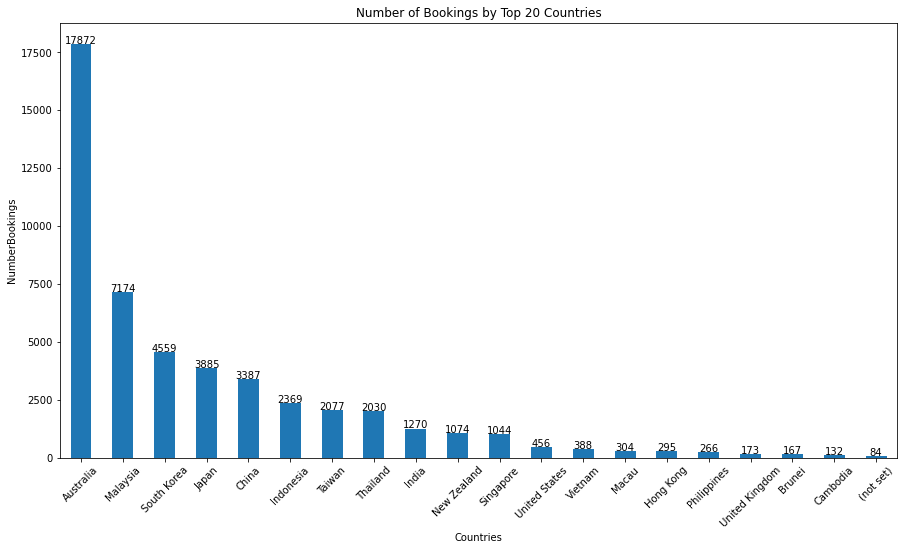

In [11]:
plt.figure(figsize=[15, 8])



ax = df.booking_origin.value_counts()[:20].plot(kind="bar")

# Annotate each bar with its value
for i, v in enumerate(df.booking_origin.value_counts()[:20]):
    ax.text(i, v + 10, str(v), ha='center')


plt.xlabel('Countries')
plt.ylabel('NumberBookings')
plt.title('Number of Bookings by Top 20 Countries')
plt.xticks(rotation=45)
plt.show()

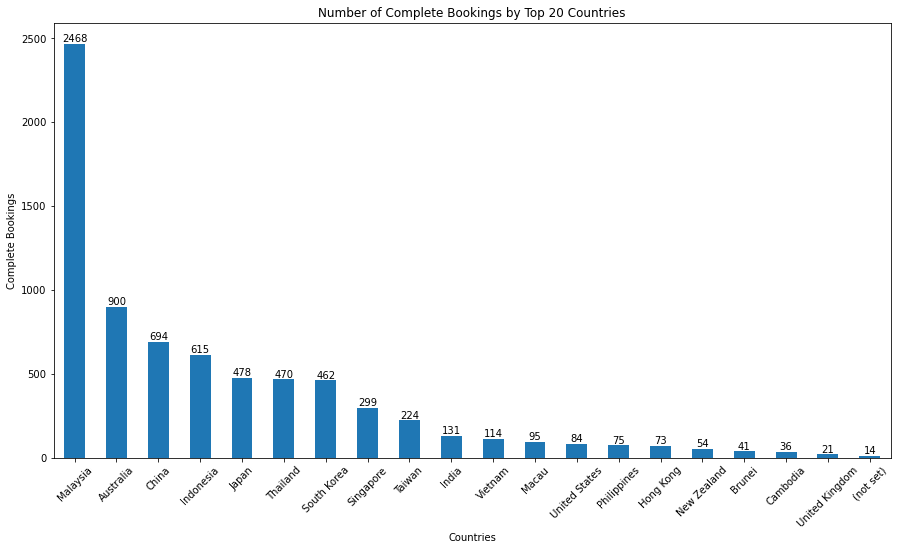

In [12]:
plt.figure(figsize=[15, 8])



ax = df[df.booking_complete ==1].booking_origin.value_counts()[:20].plot(kind="bar")

# Annotate each bar with its value
for i, v in enumerate(df[df.booking_complete ==1].booking_origin.value_counts()[:20]):
    ax.text(i, v + 10, str(v), ha='center')


plt.xlabel('Countries')
plt.ylabel('Complete Bookings')
plt.title('Number of Complete Bookings by Top 20 Countries')
plt.xticks(rotation=45)
plt.show()

In [13]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [14]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [15]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

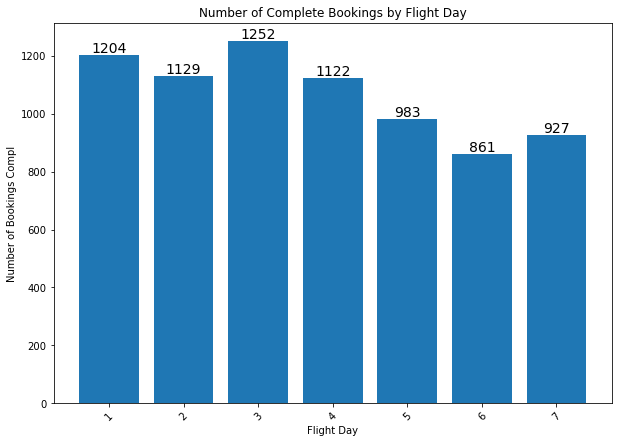

In [16]:
plot_attributes();

flight_day = df['flight_day']
booking_complete = df[df.booking_complete ==1]

booking_counts = df.groupby('flight_day')['booking_complete'].sum()

ax = plt.bar(booking_counts.index, booking_counts.values)


for i, rect in enumerate(ax):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 9, str(height), ha='center', fontsize=14)

plt.xlabel('Flight Day')
plt.ylabel('Number of Bookings Compl')
plt.title('Number of Complete Bookings by Flight Day')
plt.xticks(rotation=45)
plt.show()

In [17]:
df.to_csv('processed_data.csv')